## Import

In [ ]:
import os
from IPython.display import Image
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.utils import to_categorical

In [ ]:
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

## `Signs Dataset Overview` 

The **Signs Dataset** is a multi-class classification dataset used for recognizing **hand signs**. The dataset consists of **RGB images** of different hand gestures, where each gesture corresponds to a specific label.  

### Dataset Summary  
- **Training Samples:** 1,080  
- **Testing Samples:** 120  
- **Image Size:** 64 × 64 × 3 (Height, Width, Channels)  
- **Classes:** Multiple hand signs  


## Loading the Signs dataset

In [10]:

def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes
 

In [25]:
X_train, y_train, X_test, y_test, classes = load_dataset()

### Shape of the dataset

In [23]:
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


### Displaying Sample Images  
The **`display_samples_in_grid`** function visualizes random samples from the dataset in a grid format.  

- Selects **random images** from the dataset.  
- Arranges them in an **n_rows × n_cols** grid.  
- Displays each image using **`plt.imshow()`**.  
- Shows corresponding **labels** as titles.  

In [24]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.choice(len(X), size=n_rows*n_cols, replace=False)

    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

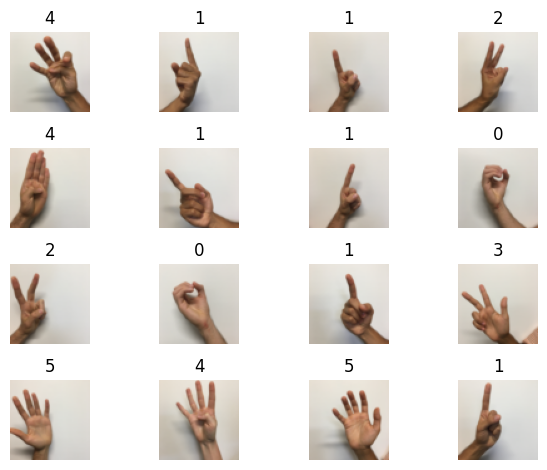

In [14]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

### Feature Scaling

In [35]:
# Flatten images into vectors (64*64*3 = 12288)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
# Normalize pixel values to range [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [37]:
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train_scaled shape: " + str(X_train.shape))
print ("X_test_scaled shape: " + str(X_test.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### One-Hot Encoding

In [ ]:
Y_train_oh = to_categorical(y_train[0])
Y_test_oh = to_categorical(y_test[0])

### Model Builder

Thefunction dynamically builds connected neural network based on provided hyperparameters

In [ ]:
def build_fc_model(input_dim, num_classes, hidden_layers, activation, dropout_rate):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## `Experiments`

Experiment Configurations
| Experiment | Hidden Layers         | Activation | Dropout |
|------------|------------------------|------------|---------|
| 1          | [256, 128]             | tanh       | 0.4     |
| 2          | [256, 128, 64]         | sigmoid    | 0.5     |
| 3          | [256, 64]              | sigmoid    | 0.1     |

#### Experiment 1

In [ ]:
model1 = build_fc_model(
    input_dim=X_train.shape[1],
    num_classes=Y_train_oh.shape[1],
    hidden_layers=[256, 128],
    activation='tanh',
    dropout_rate=0.4
)

history1 = model1.fit(
    X_train, Y_train_oh,
    validation_data=(X_test, Y_test_oh),
    epochs=100,
    batch_size=64
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.1497 - loss: 1.8296 - val_accuracy: 0.1667 - val_loss: 1.7791
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1920 - loss: 1.8083 - val_accuracy: 0.2583 - val_loss: 1.7794
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2307 - loss: 1.7639 - val_accuracy: 0.1750 - val_loss: 1.7911
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1965 - loss: 1.7942 - val_accuracy: 0.3167 - val_loss: 1.6959
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.2672 - loss: 1.7226 - val_accuracy: 0.2917 - val_loss: 1.6773
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3115 - loss: 1.6859 - val_accuracy: 0.2917 - val_loss: 1.6097
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3366 - loss: 1.6218 - val_accuracy: 0.4250 - val_loss: 1.5454
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3530 - loss: 1.5678 - val_accuracy: 0.

#### Experiment 2

In [ ]:
model2 = build_fc_model(
    input_dim=X_train.shape[1],
    num_classes=Y_train_oh.shape[1],
    hidden_layers=[256, 128, 64],
    activation='sigmoid',
    dropout_rate=0.5
)

history2 = model2.fit(
    X_train, Y_train_oh,
    validation_data=(X_test, Y_test_oh),
    epochs=100,
    batch_size=64
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.1532 - loss: 2.1238 - val_accuracy: 0.1667 - val_loss: 1.7938
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1876 - loss: 1.9198 - val_accuracy: 0.1667 - val_loss: 1.7930
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1794 - loss: 1.8770 - val_accuracy: 0.1667 - val_loss: 1.7929
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.1512 - loss: 1.8666 - val_accuracy: 0.1667 - val_loss: 1.7921
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1655 - loss: 1.8852 - val_accuracy: 0.1667 - val_loss: 1.7915
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1705 - loss: 1.8321 - val_accuracy: 0.1667 - val_loss: 1.7928
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1695 - loss: 1.8204 - val_accuracy: 0.1667 - val_loss: 1.7919
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1706 - loss: 1.8249 - val_accuracy: 0.

#### Experiment 3

In [ ]:
model3 = build_fc_model(
    input_dim=X_train.shape[1],
    num_classes=Y_train_oh.shape[1],
    hidden_layers=[256, 64],
    activation='sigmoid',
    dropout_rate=0.1
)

history3 = model3.fit(
    X_train, Y_train_oh,
    validation_data=(X_test, Y_test_oh),
    epochs=150,
    batch_size=64
)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1793 - loss: 1.9050 - val_accuracy: 0.1667 - val_loss: 1.8267
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1545 - loss: 1.8305 - val_accuracy: 0.1667 - val_loss: 1.7960
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1486 - loss: 1.8292 - val_accuracy: 0.1667 - val_loss: 1.7912
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.1585 - loss: 1.8128 - val_accuracy: 0.2417 - val_loss: 1.7902
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1792 - loss: 1.8114 - val_accuracy: 0.2000 - val_loss: 1.7884
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.1757 - loss: 1.8015 - val_accuracy: 0.2333 - val_loss: 1.7858
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1957 - loss: 1.7953 - val_accuracy: 0.1833 - val_loss: 1.7837
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1947 - loss: 1.7978 - val_accuracy: 0.

### Training Progress Visualization

In [ ]:
def plot_history(history, label):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{label} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{label} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

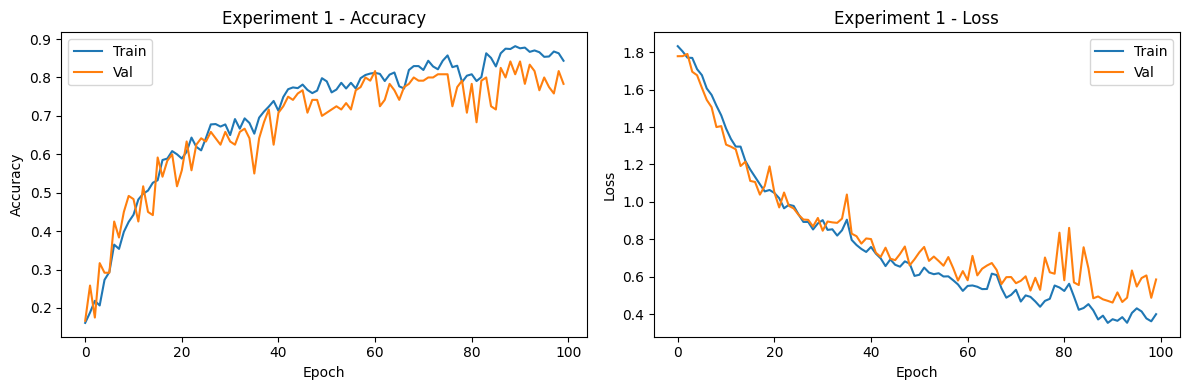

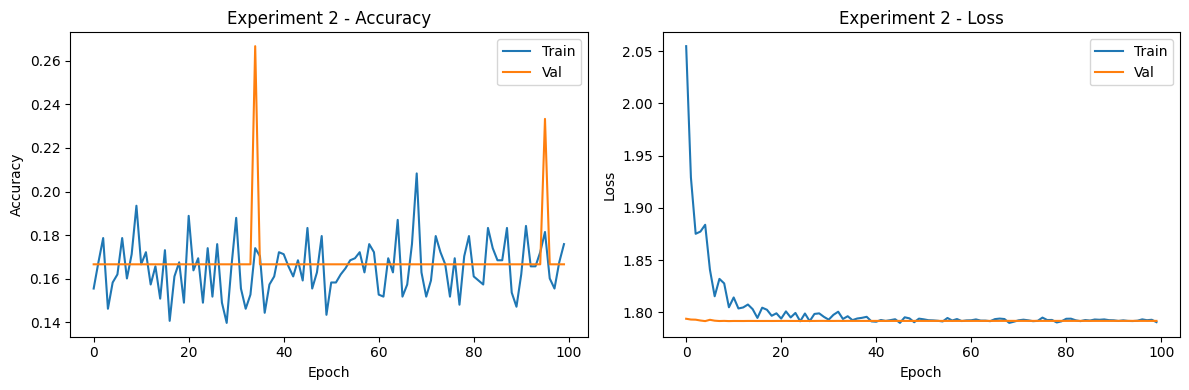

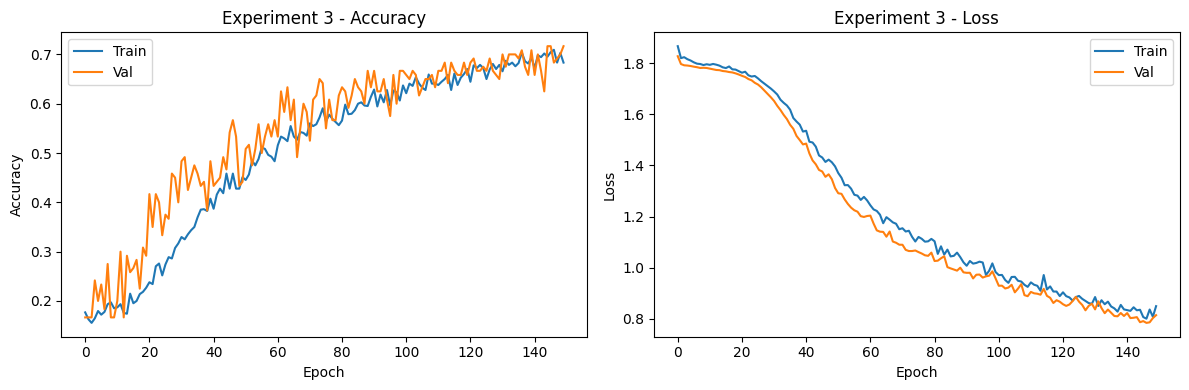

In [55]:
plot_history(history1, "Experiment 1")
plot_history(history2, "Experiment 2")
plot_history(history3, "Experiment 3")

# `Observation`

### **Experiment 1**

**Parameters:**
* Hidden Layers: `[256, 128]`
* Activation: `tanh`
* Dropout: `0.4`

**Results:**

* **Training Accuracy:** Gradually increases up to ~87%
* **Validation Accuracy:** Stays consistently around 80–85%
* **Loss:** Both training and validation losses decrease over time


### **Experiment 2**

**Parameters:**
* Hidden Layers: `[256, 128, 64]`
* Activation: `sigmoid`
* Dropout: `0.5`

**Results:**
* **Accuracy:** Stays around ~16%
* **Loss:** Remains almost flat

The model completely failed to learn 

**Reason for Poor Learning:**

* Gradient problem may be due to `sigmoid` in deeper layers.
* Dropout too high (0.5)


### **Experiment 3**

**Parameters:**

* Hidden Layers: `[256, 64]`
* Activation: `sigmoid`
* Dropout: `0.1`

**Results:**

* **Accuracy:** Gradually improves up to ~70%
* **Loss:** Slowly decreases for both training and validation sets

The model does learn but more slowly and less effectively than with `tanh`

**Reason for Poor Learning:**
* Dropout is low (0.1)
